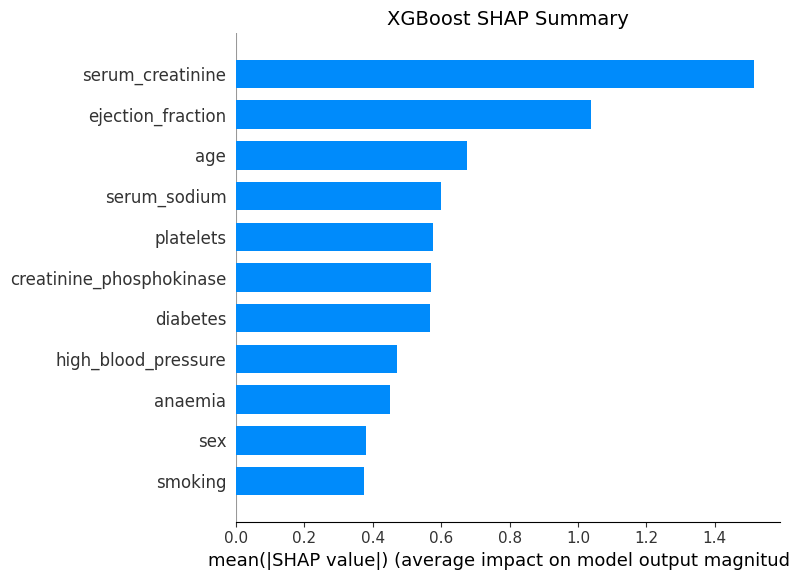

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/60 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

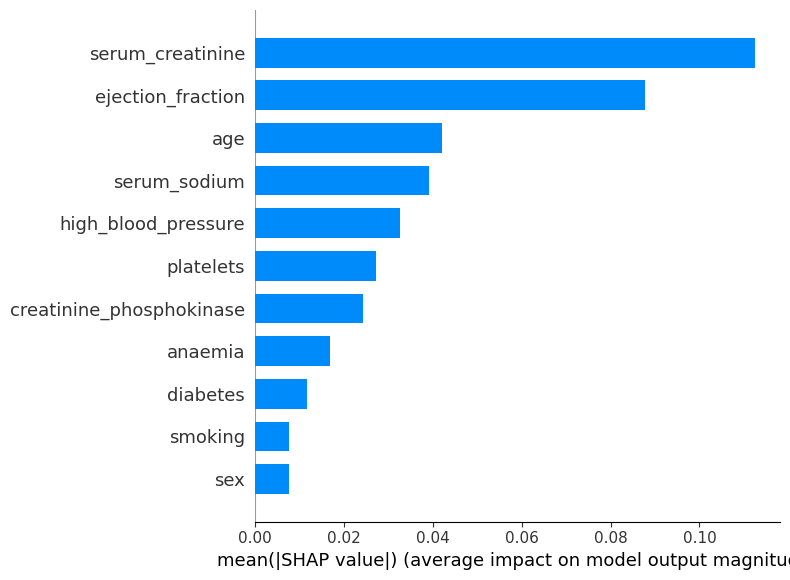

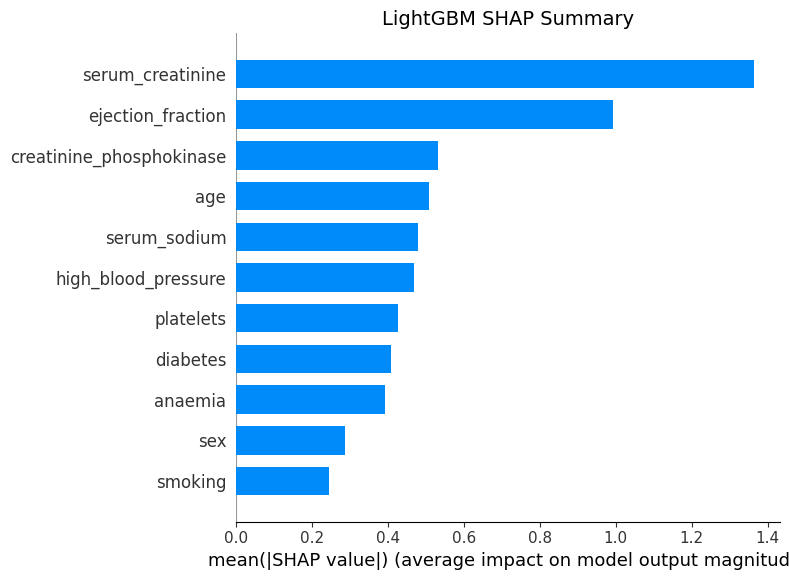

In [4]:
import shap
import joblib
import matplotlib.pyplot as plt
import pandas as pd

X_train = pd.read_csv("X_train_resampled.csv")
X_test = pd.read_csv("X_test.csv")
X_train = X_train.drop("time",axis=1)
X_test = X_test.drop("time",axis=1)

# Drop the 'Unnamed: 0' column if it exists
X_train = X_train.drop(columns=['Unnamed: 0'], errors='ignore')
X_test = X_test.drop(columns=['Unnamed: 0'], errors='ignore')

# Load models and data
R_F = joblib.load('Random Forest.joblib')
XGB = joblib.load('XGBoost.joblib')
LGB = joblib.load('LightGBM.joblib')
# Get feature names (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns.tolist()
# --------------------------------------------
# For XGBoost
# --------------------------------------------
explainer_xgb = shap.TreeExplainer(XGB)
shap_values_xgb = explainer_xgb(X_test) # or .shap_values(X_test)
# Handle multi-class outputs
if isinstance(shap_values_xgb, list):
 shap_values_xgb = shap_values_xgb[1] # Select class for explanation
# Plot with explicit feature names and figure sizing
plt.figure(figsize=(10, 6)) # Larger figure for visibility
shap.summary_plot(
 shap_values_xgb,
 X_test,
 feature_names=feature_names, # Critical for labels
 plot_type="bar",
 show=False
)
plt.title("XGBoost SHAP Summary", fontsize=14)
plt.yticks(fontsize=12) # Explicitly set y-axis font size
plt.tight_layout() # Prevent text cutoff
plt.show()
# --------------------------------------------
# For Random Forest
# --------------------------------------------
# Using KernelExplainer instead for Random Forest
# First, create a prediction function
def rf_predict(data):
    # For classification, return probabilities
    if hasattr(R_F, "predict_proba"):
        return R_F.predict_proba(data)[:, 1]  # Probability of positive class
    # For regression
    return R_F.predict(data)

# Create explainer
explainer_rf = shap.KernelExplainer(rf_predict, shap.sample(X_train, 100))  # Sample background data
shap_values_rf = explainer_rf.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values_rf,
    X_test,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
# --------------------------------------------
# For LightGBM
# --------------------------------------------
explainer_lgb = shap.TreeExplainer(LGB)
shap_values_lgb = explainer_lgb(X_test) # or .shap_values(X_test)
if isinstance(shap_values_lgb, list):
 shap_values_lgb = shap_values_lgb[1] # Select class for explanation
plt.figure(figsize=(10, 6))
shap.summary_plot(
 shap_values_lgb,
 X_test,
 feature_names=feature_names, # Must re-specify
 plot_type="bar",
 show=False
)
plt.title("LightGBM SHAP Summary", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()